# LV 02.

주차 요금 계산

https://school.programmers.co.kr/learn/courses/30/lessons/92341

**문제 설명**

    주차장의 요금표와 차량이 들어오고(입차) 나간(출차) 기록이 주어졌을 때, 차량별로 주차 요금을 계산하려고 합니다. 아래는 하나의 예시를 나타냅니다.

    요금표
    
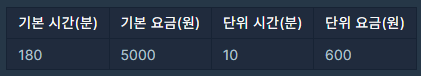

    입/출차 기록
    
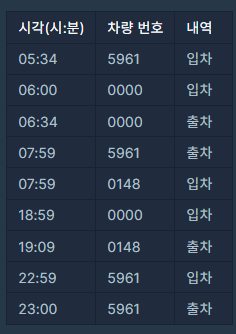

    자동차별 주차 요금
    
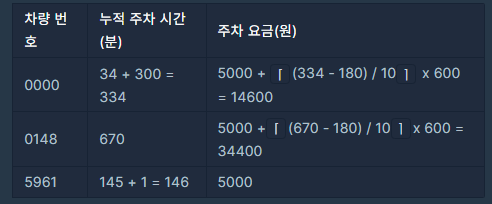

    어떤 차량이 입차된 후에 출차된 내역이 없다면, 23:59에 출차된 것으로 간주합니다.
    0000번 차량은 18:59에 입차된 이후, 출차된 내역이 없습니다. 따라서, 23:59에 출차된 것으로 간주합니다.
    00:00부터 23:59까지의 입/출차 내역을 바탕으로 차량별 누적 주차 시간을 계산하여 요금을 일괄로 정산합니다.
    누적 주차 시간이 기본 시간이하라면, 기본 요금을 청구합니다.
    누적 주차 시간이 기본 시간을 초과하면, 기본 요금에 더해서, 초과한 시간에 대해서 단위 시간 마다 단위 요금을 청구합니다.
    초과한 시간이 단위 시간으로 나누어 떨어지지 않으면, 올림합니다.
    ⌈a⌉ : a보다 작지 않은 최소의 정수를 의미합니다. 즉, 올림을 의미합니다.
    주차 요금을 나타내는 정수 배열 fees, 자동차의 입/출차 내역을 나타내는 문자열 배열 records가 매개변수로 주어집니다. 차량 번호가 작은 자동차부터 청구할 주차 요금을 차례대로 정수 배열에 담아서 return 하도록 solution 함수를 완성해주세요.
    
    
**제한 사항**

    fees의 길이 = 4

    fees[0] = 기본 시간(분)
    1 ≤ fees[0] ≤ 1,439
    fees[1] = 기본 요금(원)
    0 ≤ fees[1] ≤ 100,000
    fees[2] = 단위 시간(분)
    1 ≤ fees[2] ≤ 1,439
    fees[3] = 단위 요금(원)
    1 ≤ fees[3] ≤ 10,000
    1 ≤ records의 길이 ≤ 1,000

    records의 각 원소는 "시각 차량번호 내역" 형식의 문자열입니다.
    시각, 차량번호, 내역은 하나의 공백으로 구분되어 있습니다.
    시각은 차량이 입차되거나 출차된 시각을 나타내며, HH:MM 형식의 길이 5인 문자열입니다.
    HH:MM은 00:00부터 23:59까지 주어집니다.
    잘못된 시각("25:22", "09:65" 등)은 입력으로 주어지지 않습니다.
    차량번호는 자동차를 구분하기 위한, `0'~'9'로 구성된 길이 4인 문자열입니다.
    내역은 길이 2 또는 3인 문자열로, IN 또는 OUT입니다. IN은 입차를, OUT은 출차를 의미합니다.
    records의 원소들은 시각을 기준으로 오름차순으로 정렬되어 주어집니다.
    records는 하루 동안의 입/출차된 기록만 담고 있으며, 입차된 차량이 다음날 출차되는 경우는 입력으로 주어지지 않습니다.
    같은 시각에, 같은 차량번호의 내역이 2번 이상 나타내지 않습니다.
    마지막 시각(23:59)에 입차되는 경우는 입력으로 주어지지 않습니다.
    아래의 예를 포함하여, 잘못된 입력은 주어지지 않습니다.
    주차장에 없는 차량이 출차되는 경우
    주차장에 이미 있는 차량(차량번호가 같은 차량)이 다시 입차되는 경우
    
    
    
**입출력 예**

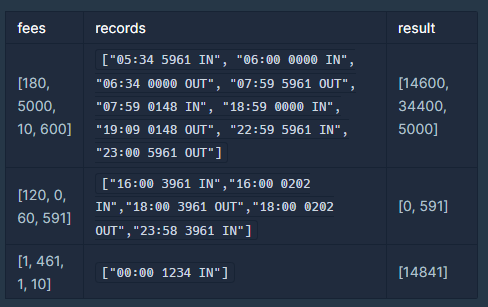


**입출력 예 설명**

    입출력 예 #1
    문제 예시와 같습니다.

    입출력 예 #2
    
    <요금표>
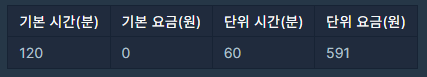

    <입/출차 기록>   
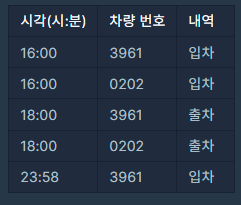    

    <자동차별 주차 요금>
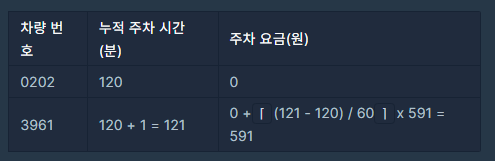    

    3961번 차량은 2번째 입차된 후에는 출차된 내역이 없으므로, 23:59에 출차되었다고 간주합니다.
    
    입출력 예 #3
    
    <요금표>
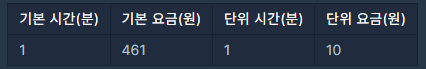

    <입/출차 기록>
    
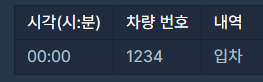    

    <자동차별 주차 요금>
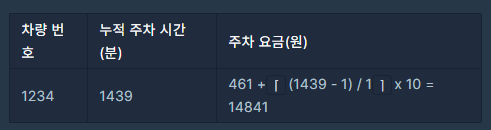

    1234번 차량은 출차 내역이 없으므로, 23:59에 출차되었다고 간주합니다.
    
 **제한시간 안내**
     
     정확성 테스트 : 10초
    

In [91]:
import math

def solution(fees, records):
    answer = []
    car_dict = dict()
    
    for record in records:
        r = record.split(' ')
        if r[1] not in car_dict:
            car_dict[r[1]] = list()
            car_dict[r[1]].append(int(r[0].split(':')[0])*60 + int(r[0].split(':')[1]))

        else:
            car_dict[r[1]].append(int(r[0].split(':')[0])*60 + int(r[0].split(':')[1]))

    for k, y in car_dict.items():
        if len(y)%2 !=0:
            car_dict[k].append((23*60)+59)

    car_dict = dict(sorted(car_dict.items()))

    for k,v in car_dict.items():
        tmp_time = 0
        for v_i in range(0,len(v),2):
            tmp_time += v[v_i+1]-v[v_i]

        if tmp_time <fees[0]:
            total_fee = fees[1]
        else:
            total_fee = fees[1] + (math.ceil(((tmp_time-fees[0])/fees[2])) * fees[3])

        answer.append(total_fee)

    
    return answer

In [92]:
print(solution([180, 5000, 10, 600], ["05:34 5961 IN", "06:00 0000 IN", "06:34 0000 OUT", "07:59 5961 OUT",
           "07:59 0148 IN", "18:59 0000 IN", "19:09 0148 OUT", "22:59 5961 IN",
           "23:00 5961 OUT"]))

print(solution([120, 0, 60, 591],["16:00 3961 IN","16:00 0202 IN","18:00 3961 OUT","18:00 0202 OUT","23:58 3961 IN"]))


print(solution([1, 461, 1, 10],["00:00 1234 IN"]))

[14600, 34400, 5000]
[0, 591]
[14841]


In [65]:
fees = [180, 5000, 10, 600]

records = ["05:34 5961 IN", "06:00 0000 IN", "06:34 0000 OUT", "07:59 5961 OUT",
           "07:59 0148 IN", "18:59 0000 IN", "19:09 0148 OUT", "22:59 5961 IN",
           "23:00 5961 OUT"]

In [89]:
fees = [1, 461, 1, 10]

records = ["00:00 1234 IN"]

In [90]:
import math

car_dict = dict()
answer = []

for record in records:
    r = record.split(' ')
    if r[1] not in car_dict:
        car_dict[r[1]] = list()
        car_dict[r[1]].append(int(r[0].split(':')[0])*60 + int(r[0].split(':')[1]))
        
    else:
        car_dict[r[1]].append(int(r[0].split(':')[0])*60 + int(r[0].split(':')[1]))

for k, y in car_dict.items():
    if len(y)%2 !=0:
        car_dict[k].append((23*60)+59)
        
car_dict = dict(sorted(car_dict.items()))

for k,v in car_dict.items():
    tmp_time = 0
    for v_i in range(0,len(v),2):
        tmp_time += v[v_i+1]-v[v_i]
    print(f" v, tmp_time -> {v}, {tmp_time}")
    
    if tmp_time <fees[0]:
        total_fee = fees[1]
    else:
        total_fee = fees[1] + (math.ceil(((tmp_time-fees[0])/fees[2])) * fees[3])
    
    answer.append(total_fee)
    
answer

 v, tmp_time -> [0, 1439], 1439


[14841]

**다른 사람 풀이**

    wow..? 클래스로 구현 따리를 해버리는.
    
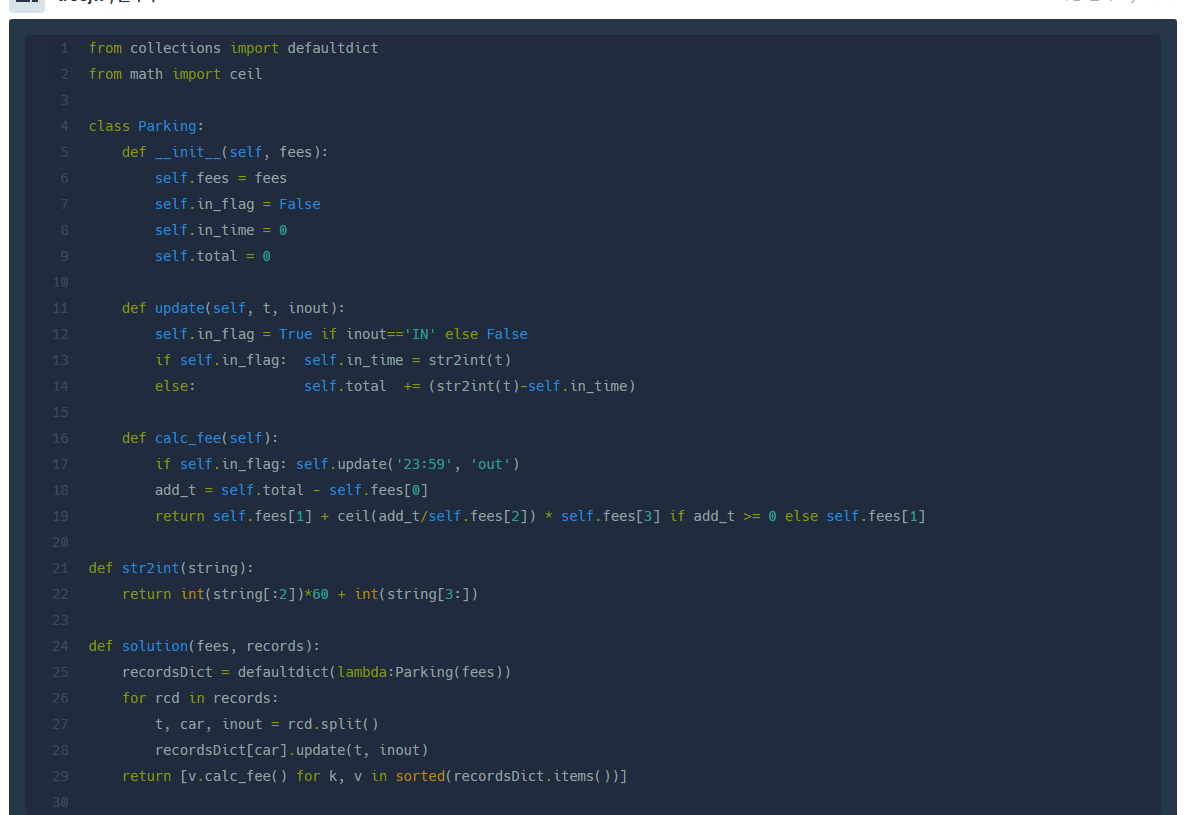    